In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("D:\Google Drive\Drug Discovery\Dataset\Kidron_drug_discovery.csv")
dataset.head()

,Name,MW,MV,PSA,HBD,HBA,HBtot,logP,logD70,logD74,logD80,perm
0,"acetazolamideb,c",222.3,127,151.7,3,7,10,-0.26,-0.40,-0.55,-0.94,9.100000e-07
1,alprenolold,249.3,247,41.5,2,3,5,2.88,0.77,1.13,1.70,2.900000e-05
2,atenolole,266.3,237,84.6,4,5,9,0.10,-2.02,-1.65,-1.09,6.700000e-07
3,benzolamideb,320.4,183,177.1,3,8,11,0.20,-1.40,-1.70,-2.11,1.400000e-07
4,bevantolole,345.4,311,60.0,2,5,7,3.38,1.71,2.09,2.62,5.400000e-05


In [4]:
dataset['logP'].corr(dataset['perm'])

0.4260010344161657

In [6]:
print(dataset['perm'].corr(dataset['PSA']))

-0.3593149714043735


In [7]:
dat_mod = dataset.iloc[:,1:]
dat_mod.head()

,MW,MV,PSA,HBD,HBA,HBtot,logP,logD70,logD74,logD80,perm
0,222.3,127,151.7,3,7,10,-0.26,-0.40,-0.55,-0.94,9.100000e-07
1,249.3,247,41.5,2,3,5,2.88,0.77,1.13,1.70,2.900000e-05
2,266.3,237,84.6,4,5,9,0.10,-2.02,-1.65,-1.09,6.700000e-07
3,320.4,183,177.1,3,8,11,0.20,-1.40,-1.70,-2.11,1.400000e-07
4,345.4,311,60.0,2,5,7,3.38,1.71,2.09,2.62,5.400000e-05


In [10]:
dat_mod.dropna(inplace=True)
dat_mod.corr()

,MW,MV,PSA,HBD,HBA,HBtot,logP,logD70,logD74,logD80,perm
MW,1.000000,0.502400,0.304801,0.088730,0.625525,0.560004,0.424630,0.184313,0.148715,0.110058,-0.408368
MV,0.502400,1.000000,-0.155494,0.072099,-0.173694,-0.116071,0.426351,-0.006986,0.101961,0.264967,0.075261
PSA,0.304801,-0.155494,1.000000,0.128763,0.463428,0.440575,-0.090102,-0.066588,-0.140994,-0.236878,-0.359315
HBD,0.088730,0.072099,0.128763,1.000000,0.194186,0.570214,-0.260440,-0.228562,-0.215583,-0.182151,-0.459297
HBA,0.625525,-0.173694,0.463428,0.194186,1.000000,0.916587,-0.170588,-0.172360,-0.297147,-0.445807,-0.722534
HBtot,0.560004,-0.116071,0.440575,0.570214,0.916587,1.000000,-0.249011,-0.237501,-0.336713,-0.447579,-0.792284
logP,0.424630,0.426351,-0.090102,-0.260440,-0.170588,-0.249011,1.000000,0.737880,0.776644,0.812975,0.426001
logD70,0.184313,-0.006986,-0.066588,-0.228562,-0.172360,-0.237501,0.737880,1.000000,0.984263,0.904734,0.488353
logD74,0.148715,0.101961,-0.140994,-0.215583,-0.297147,-0.336713,0.776644,0.984263,1.000000,0.964619,0.563146
logD80,0.110058,0.264967,-0.236878,-0.182151,-0.445807,-0.447579,0.812975,0.904734,0.964619,1.000000,0.634637


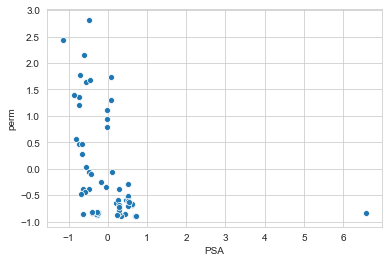

In [41]:
sns.set_style("whitegrid")
sns.scatterplot(x='PSA', y='perm', data=dat_mod)

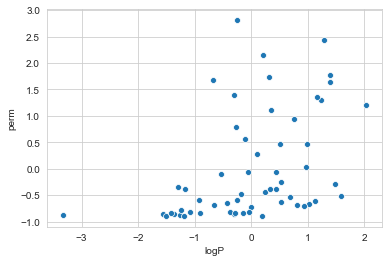

In [42]:
sns.scatterplot(x='logP', y='perm', data=dat_mod)

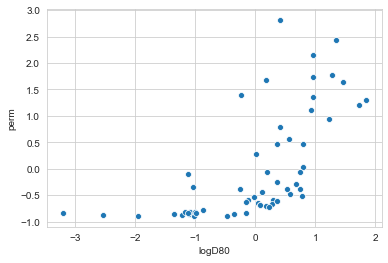

In [43]:
sns.scatterplot(x='logD80', y='perm', data=dat_mod)

In [11]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
dat_mod[['MW','MV', 'PSA','HBD', 'HBA', 'HBtot', 'logP', 'logD70', 'logD74','logD80','perm']] = scaler.fit_transform(dat_mod[['MW','MV', 'PSA','HBD', 'HBA', 'HBtot', 'logP', 'logD70', 'logD74','logD80','perm']])
dat_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 11 columns):
MW        58 non-null float64
MV        58 non-null float64
PSA       58 non-null float64
HBD       58 non-null float64
HBA       58 non-null float64
HBtot     58 non-null float64
logP      58 non-null float64
logD70    58 non-null float64
logD74    58 non-null float64
logD80    58 non-null float64
perm      58 non-null float64
dtypes: float64(11)
memory usage: 5.4 KB


In [14]:
dat_mod.head()

,MW,MV,PSA,HBD,HBA,HBtot,logP,logD70,logD74,logD80,perm
0,-1.129050,-1.345579,0.431028,0.993127,0.996953,1.239679,-1.558742,-0.638605,-0.812971,-1.106671,-0.856626
1,-0.605745,1.083163,-0.743494,-0.206901,-1.339341,-1.205946,0.987021,0.239525,0.465117,0.802018,0.462759
2,-0.276256,0.880768,-0.284130,2.193156,-0.171194,0.750554,-1.266871,-1.854477,-1.649814,-1.215119,-0.867899
3,0.772294,-0.212166,0.701744,0.993127,1.581027,1.728804,-1.185796,-1.389143,-1.687852,-1.952567,-0.892793
4,1.256836,2.378492,-0.546319,-0.206901,-0.171194,-0.227696,1.392398,0.945031,1.195453,1.467167,1.637007


In [15]:
dat_mod.corr()

,MW,MV,PSA,HBD,HBA,HBtot,logP,logD70,logD74,logD80,perm
MW,1.000000,0.502400,0.304801,0.088730,0.625525,0.560004,0.424630,0.184313,0.148715,0.110058,-0.408368
MV,0.502400,1.000000,-0.155494,0.072099,-0.173694,-0.116071,0.426351,-0.006986,0.101961,0.264967,0.075261
PSA,0.304801,-0.155494,1.000000,0.128763,0.463428,0.440575,-0.090102,-0.066588,-0.140994,-0.236878,-0.359315
HBD,0.088730,0.072099,0.128763,1.000000,0.194186,0.570214,-0.260440,-0.228562,-0.215583,-0.182151,-0.459297
HBA,0.625525,-0.173694,0.463428,0.194186,1.000000,0.916587,-0.170588,-0.172360,-0.297147,-0.445807,-0.722534
HBtot,0.560004,-0.116071,0.440575,0.570214,0.916587,1.000000,-0.249011,-0.237501,-0.336713,-0.447579,-0.792284
logP,0.424630,0.426351,-0.090102,-0.260440,-0.170588,-0.249011,1.000000,0.737880,0.776644,0.812975,0.426001
logD70,0.184313,-0.006986,-0.066588,-0.228562,-0.172360,-0.237501,0.737880,1.000000,0.984263,0.904734,0.488353
logD74,0.148715,0.101961,-0.140994,-0.215583,-0.297147,-0.336713,0.776644,0.984263,1.000000,0.964619,0.563146
logD80,0.110058,0.264967,-0.236878,-0.182151,-0.445807,-0.447579,0.812975,0.904734,0.964619,1.000000,0.634637


In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

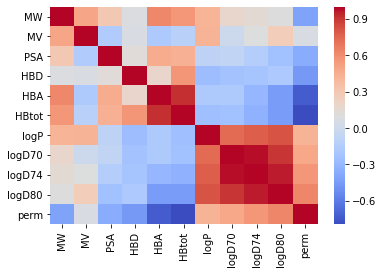

In [19]:
sns.heatmap(dat_mod.corr(), cmap="coolwarm")

In [20]:
from sklearn.cluster import KMeans

In [21]:
kmeans = KMeans(n_clusters=3, random_state=0)
#kmeans.fit_transform(df)
y_kmeans = kmeans.fit_predict(dat_mod)

In [22]:
y_kmeans

array([2, 1, 2, 2, 1, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 2, 2, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0])

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=2)
pComponents = pca.fit_transform(dat_mod)
pDf = pd.DataFrame(data = pComponents
             , columns = ['pc1', 'pc2'])

In [25]:
pDf.head()

,pc1,pc2
0,-2.911206,0.811302
1,2.246814,0.647047
2,-3.035813,1.000711
3,-4.158543,-0.429795
4,2.922025,-1.860359


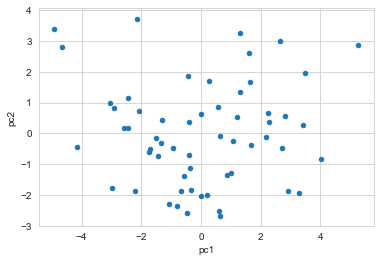

In [44]:
# finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
pDf.plot.scatter(x='pc1', y='pc2')

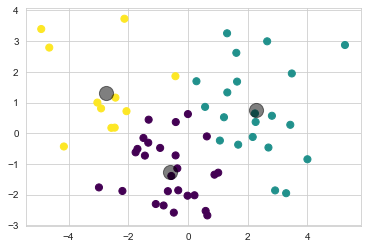

In [45]:
plt.scatter(pDf.iloc[:, 0], pDf.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [46]:
from sklearn import metrics
from scipy.spatial.distance import cdist

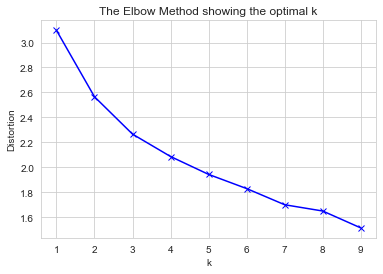

In [47]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k).fit(dat_mod)
    km.fit(dat_mod)
    distortions.append(sum(np.min(cdist(dat_mod, km.cluster_centers_, 'euclidean'), axis=1)) / dat_mod.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

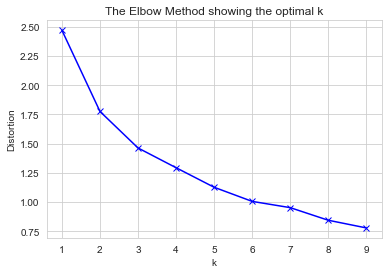

In [48]:
# determine k using pDf
distortions = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k).fit(pDf)
    km.fit(pDf)
    distortions.append(sum(np.min(cdist(pDf, km.cluster_centers_, 'euclidean'), axis=1)) / pDf.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [49]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(pDf)

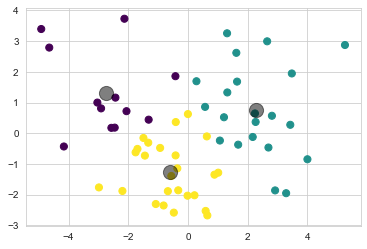

In [50]:
plt.scatter(pDf.iloc[:, 0], pDf.iloc[:, 1], c=clusters, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);